In [34]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
dengue = pd.read_csv("dengue_limpio.csv")
dengue

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city_sj,city_iq
0,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,True,False
1,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,True,False
2,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,True,False
3,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,True,False
4,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,...,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,False,True
1452,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,...,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,False,True
1453,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,...,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,False,True
1454,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,...,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,False,True


In [36]:
dengue.drop("week_start_date", inplace=True, axis=1)

In [40]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   year                                   1456 non-null   int64  
 1   weekofyear                             1456 non-null   int64  
 2   ndvi_ne                                1456 non-null   float64
 3   ndvi_nw                                1456 non-null   float64
 4   ndvi_se                                1456 non-null   float64
 5   ndvi_sw                                1456 non-null   float64
 6   precipitation_amt_mm                   1456 non-null   float64
 7   reanalysis_air_temp_k                  1456 non-null   float64
 8   reanalysis_avg_temp_k                  1456 non-null   float64
 9   reanalysis_dew_point_temp_k            1456 non-null   float64
 10  reanalysis_max_air_temp_k              1456 non-null   float64
 11  rean

In [37]:
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(dengue)
kmeans.cluster_centers_.shape

(2, 24)

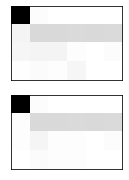

In [38]:
fig, ax = plt.subplots(2, 1, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(2, 4, 6)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)